In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. trento'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,29.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,22,P.A. Trento,0,0,0,0,0,0,0,...,0.0,11.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2021-04-11T17:00:00,22,P.A. Trento,146,41,187,1466,1653,-87,93,...,0.0,2207.0,231.0,-93.0,21.93,11.31,4.21,40.26,-4.65,-5.00
412,2021-04-12T17:00:00,22,P.A. Trento,151,42,193,1370,1563,-90,24,...,0.0,534.0,87.0,-96.0,21.76,12.35,4.49,27.59,2.44,-5.44
413,2021-04-13T17:00:00,22,P.A. Trento,147,37,184,1329,1513,-50,119,...,3.0,2248.0,277.0,-41.0,20.11,12.16,5.29,42.96,-11.90,-3.20
414,2021-04-14T17:00:00,22,P.A. Trento,135,37,172,1309,1481,-32,133,...,1.0,2450.0,300.0,-20.0,21.51,11.61,5.43,44.33,0.00,-2.12


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 117
Nuovi tamponi: 2439.0
Percentuale nuovi positivi/nuovi tamponi: 4.8 %
Nuovi guariti: 144.0
Nuovi deceduti: 3.0
Variazione positivi ricoverati con sintomi: -8.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: -19.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-14T17:00:00,22,P.A. Trento,164,26,190,2599,2789,76,167,...,1.0,2483.0,248.0,68.0,13.68,6.81,6.73,67.34,0.00,2.80
1,2021-02-15T17:00:00,22,P.A. Trento,174,27,201,2482,2683,-106,26,...,2.0,646.0,157.0,-117.0,13.43,7.49,4.02,16.56,3.85,-3.80
2,2021-02-16T17:00:00,22,P.A. Trento,168,27,195,2522,2717,34,195,...,4.0,2201.0,281.0,40.0,13.85,7.18,8.86,69.40,0.00,1.27
3,2021-02-17T17:00:00,22,P.A. Trento,162,26,188,2599,2787,70,311,...,4.0,3787.0,424.0,77.0,13.83,6.75,8.21,73.35,-3.70,2.58
4,2021-02-18T17:00:00,22,P.A. Trento,172,27,199,2700,2899,112,292,...,2.0,3520.0,306.0,101.0,13.57,6.86,8.30,95.42,3.85,4.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-11T17:00:00,22,P.A. Trento,146,41,187,1466,1653,-87,93,...,0.0,2207.0,231.0,-93.0,21.93,11.31,4.21,40.26,-4.65,-5.00
57,2021-04-12T17:00:00,22,P.A. Trento,151,42,193,1370,1563,-90,24,...,0.0,534.0,87.0,-96.0,21.76,12.35,4.49,27.59,2.44,-5.44
58,2021-04-13T17:00:00,22,P.A. Trento,147,37,184,1329,1513,-50,119,...,3.0,2248.0,277.0,-41.0,20.11,12.16,5.29,42.96,-11.90,-3.20
59,2021-04-14T17:00:00,22,P.A. Trento,135,37,172,1309,1481,-32,133,...,1.0,2450.0,300.0,-20.0,21.51,11.61,5.43,44.33,0.00,-2.12


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

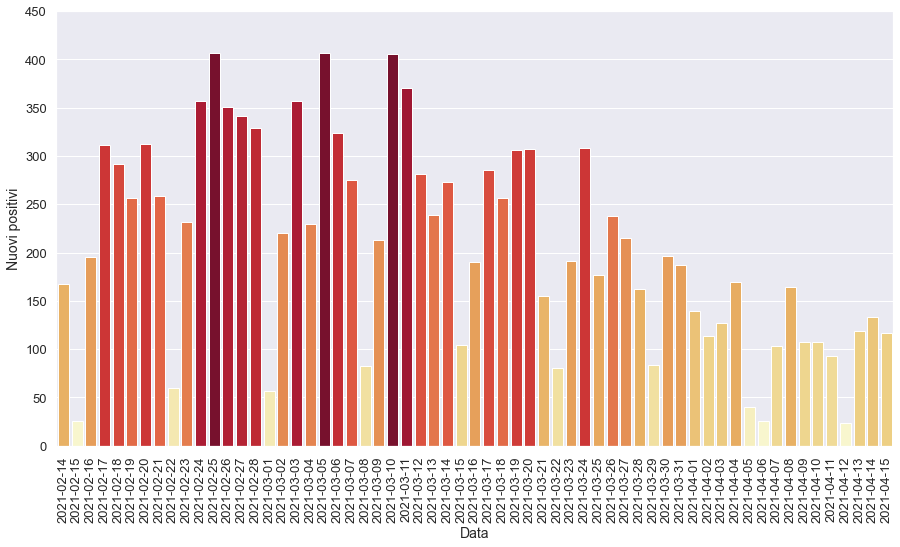

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

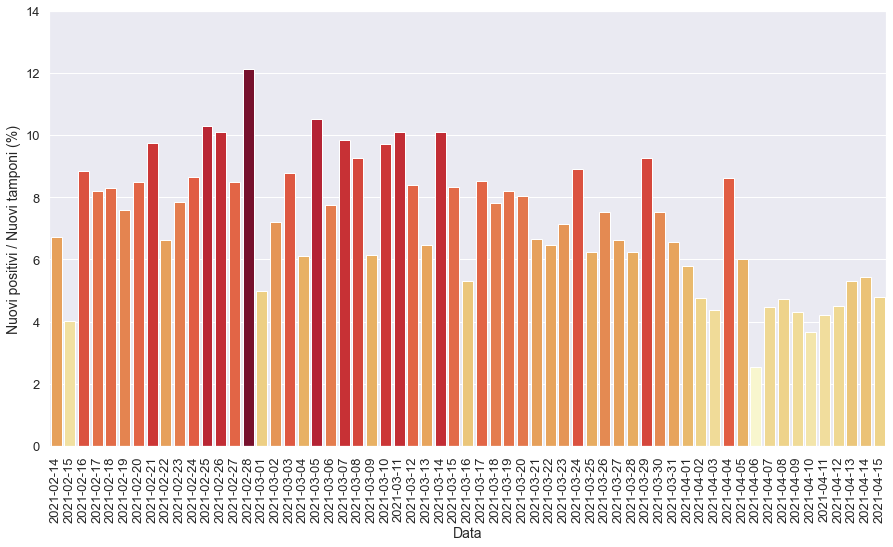

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

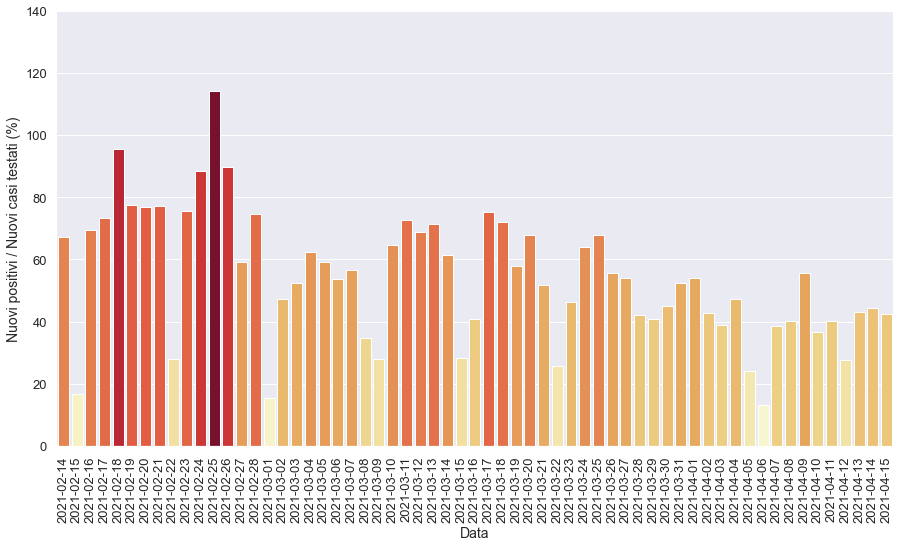

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

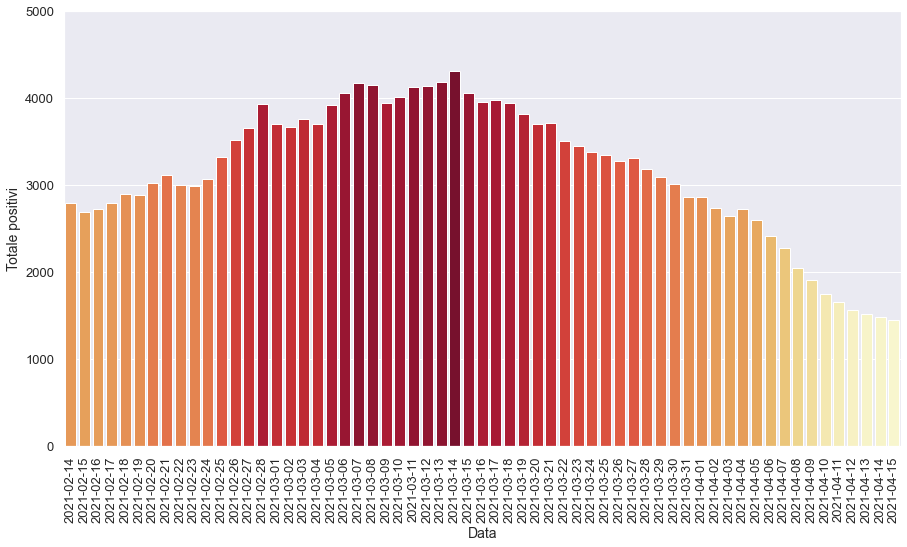

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

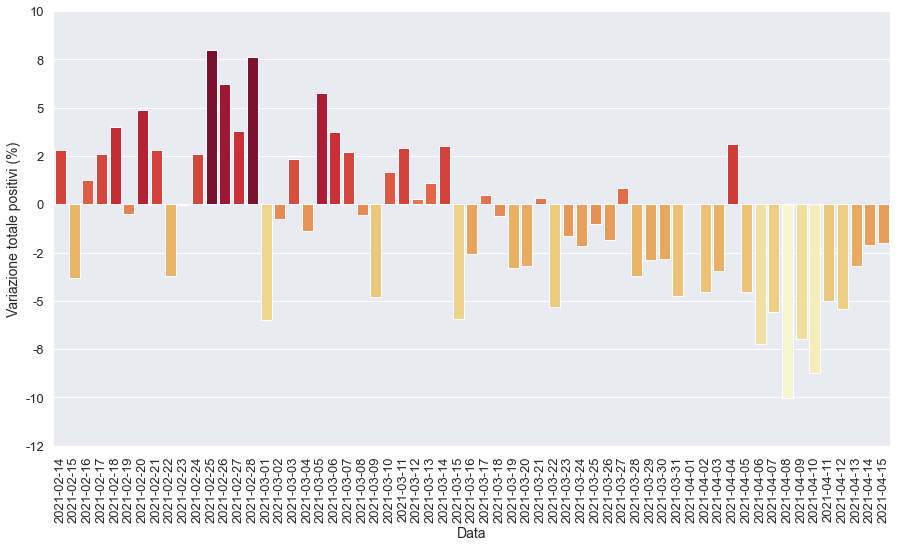

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

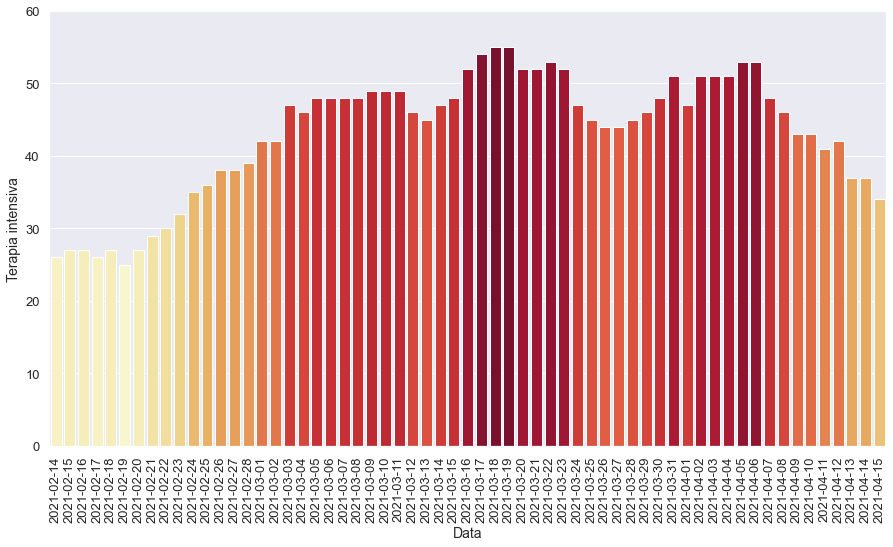

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

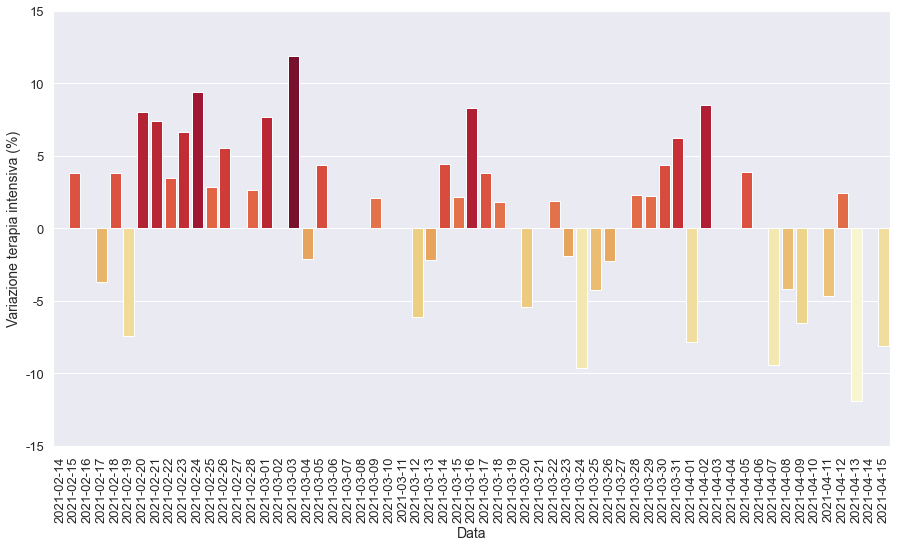

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

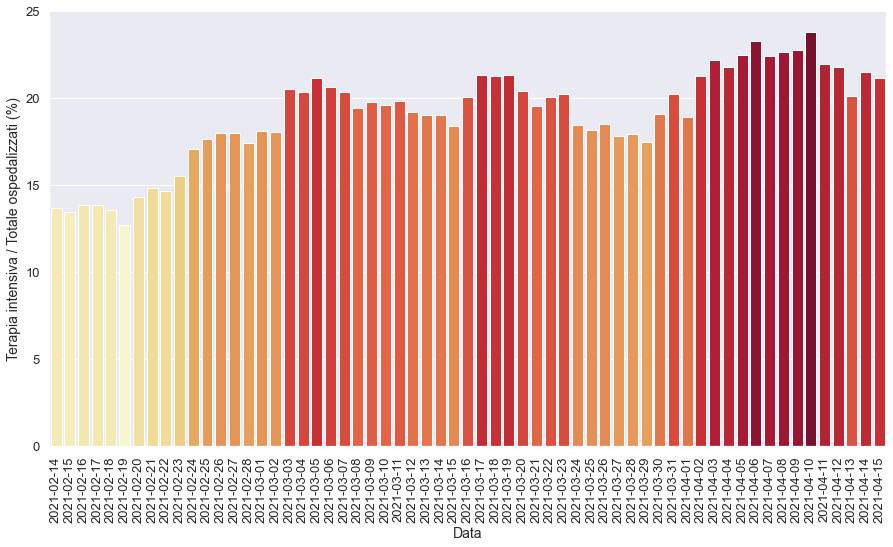

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

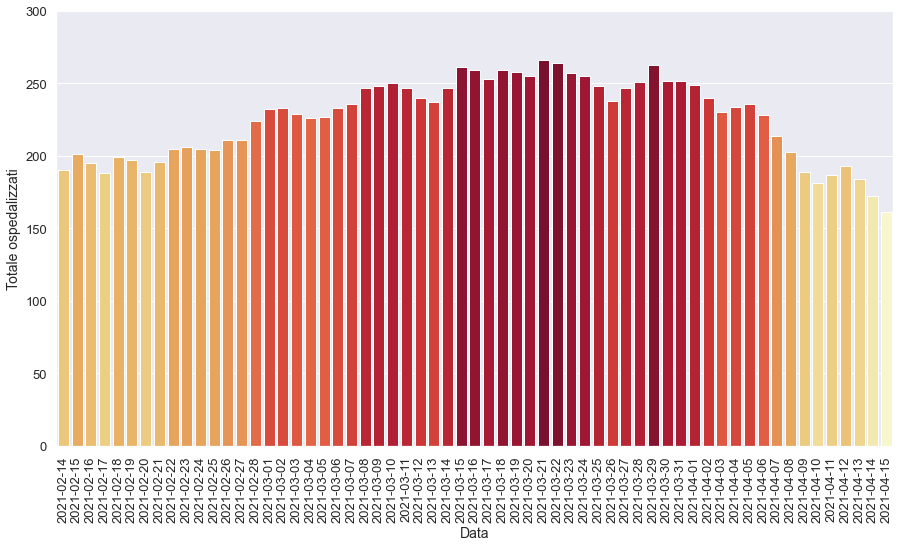

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

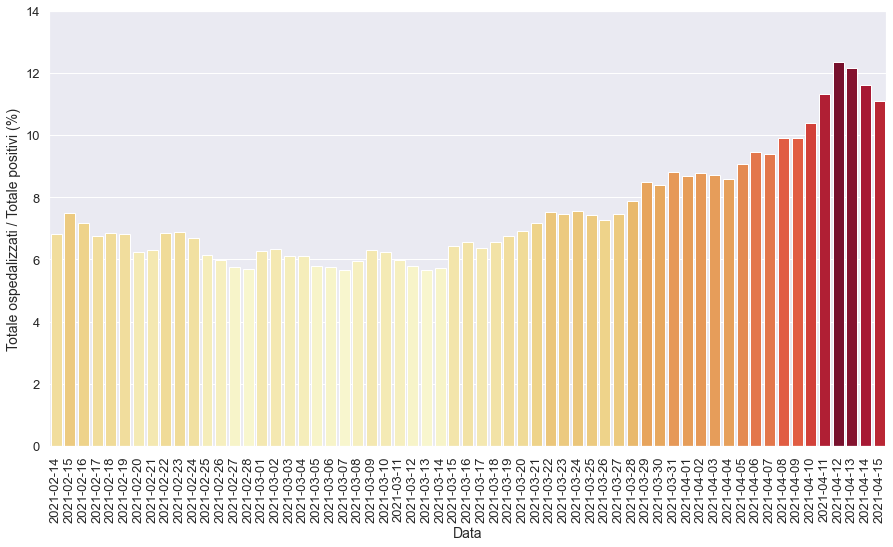

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

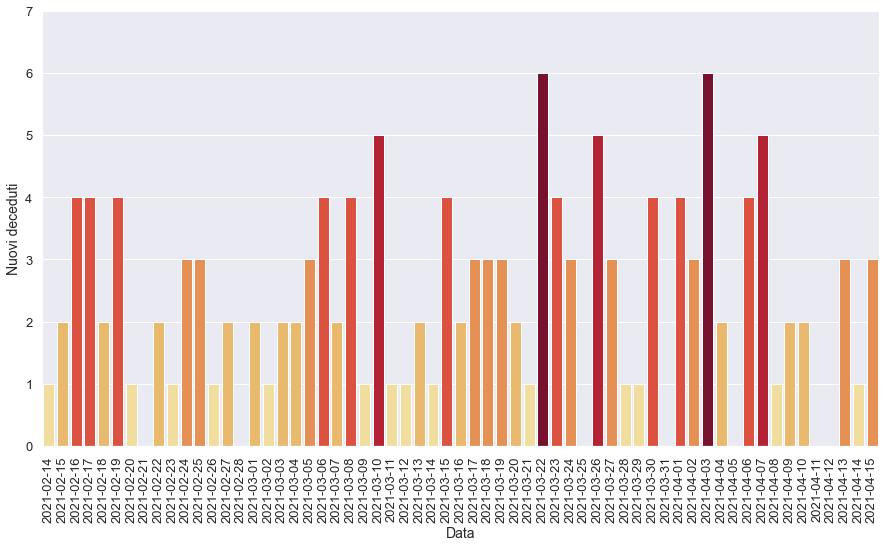

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

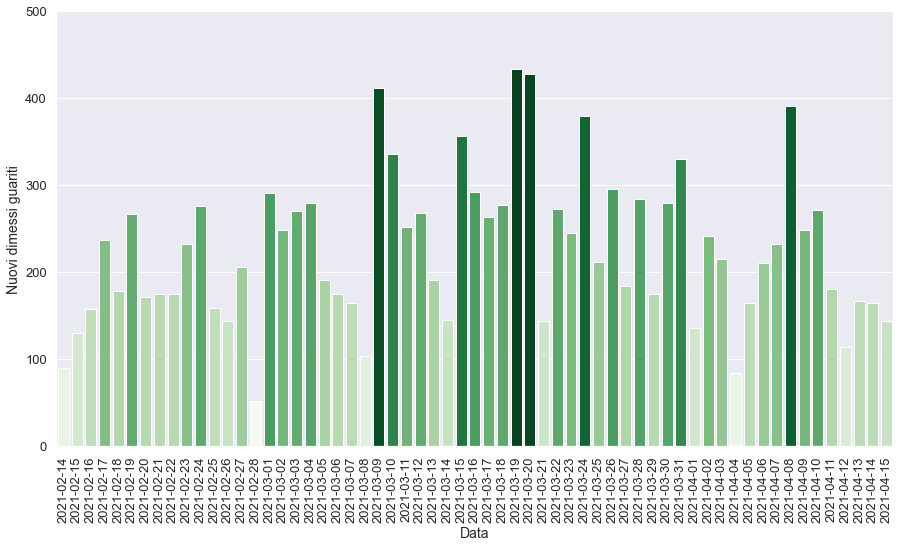

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-16T17:00:00,22,P.A. Trento,207,52,259,3693,3952,-104,190,...,2.0,3571.0,465.0,-102.0,20.08,6.55,5.32,40.86,8.33,-2.56
1,2021-03-17T17:00:00,22,P.A. Trento,199,54,253,3718,3971,19,285,...,3.0,3346.0,379.0,25.0,21.34,6.37,8.52,75.20,3.85,0.48
2,2021-03-18T17:00:00,22,P.A. Trento,204,55,259,3688,3947,-24,256,...,3.0,3270.0,355.0,-30.0,21.24,6.56,7.83,72.11,1.85,-0.60
3,2021-03-19T17:00:00,22,P.A. Trento,203,55,258,3559,3817,-130,306,...,3.0,3738.0,528.0,-129.0,21.32,6.76,8.19,57.95,0.00,-3.29
4,2021-03-20T17:00:00,22,P.A. Trento,203,52,255,3440,3695,-122,307,...,2.0,3820.0,453.0,-119.0,20.39,6.90,8.04,67.77,-5.45,-3.20
5,2021-03-21T17:00:00,22,P.A. Trento,214,52,266,3440,3706,11,155,...,1.0,2329.0,299.0,0.0,19.55,7.18,6.66,51.84,0.00,0.30
6,2021-03-22T17:00:00,22,P.A. Trento,211,53,264,3244,3508,-198,80,...,6.0,1237.0,313.0,-196.0,20.08,7.53,6.47,25.56,1.92,-5.34
7,2021-03-23T17:00:00,22,P.A. Trento,205,52,257,3193,3450,-58,191,...,4.0,2670.0,413.0,-51.0,20.23,7.45,7.15,46.25,-1.89,-1.65
8,2021-03-24T17:00:00,22,P.A. Trento,208,47,255,3121,3376,-74,308,...,3.0,3460.0,482.0,-72.0,18.43,7.55,8.90,63.90,-9.62,-2.14
9,2021-03-25T17:00:00,22,P.A. Trento,203,45,248,3094,3342,-34,177,...,0.0,2841.0,261.0,-27.0,18.15,7.42,6.23,67.82,-4.26,-1.01


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

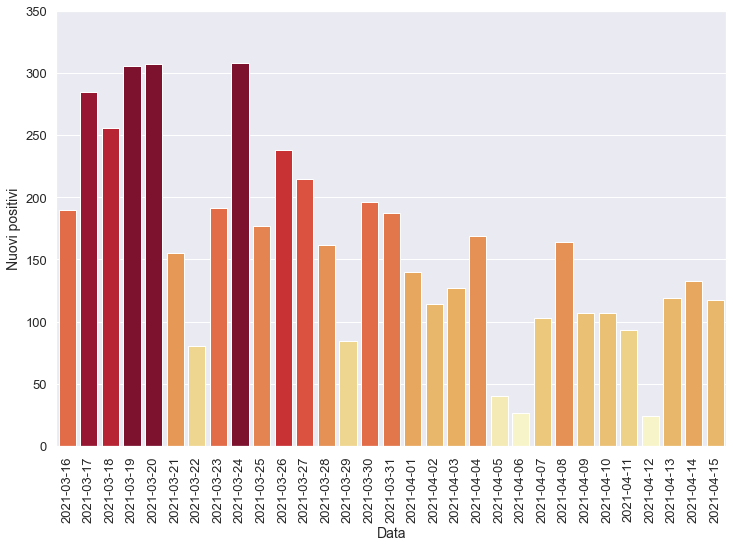

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

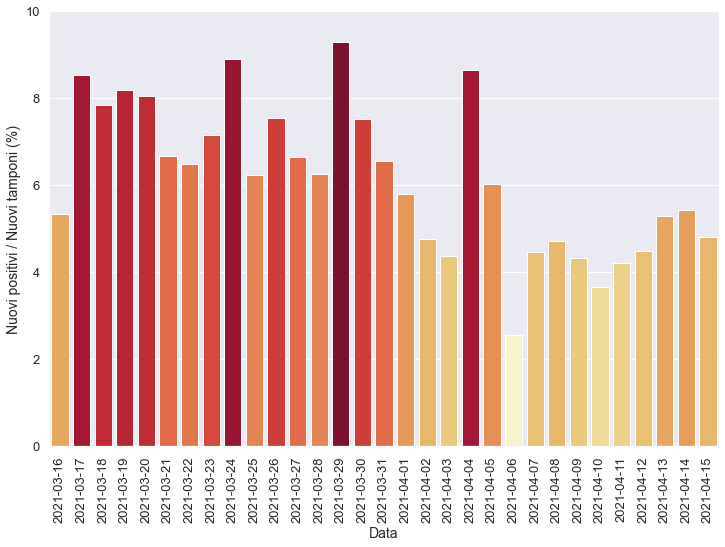

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

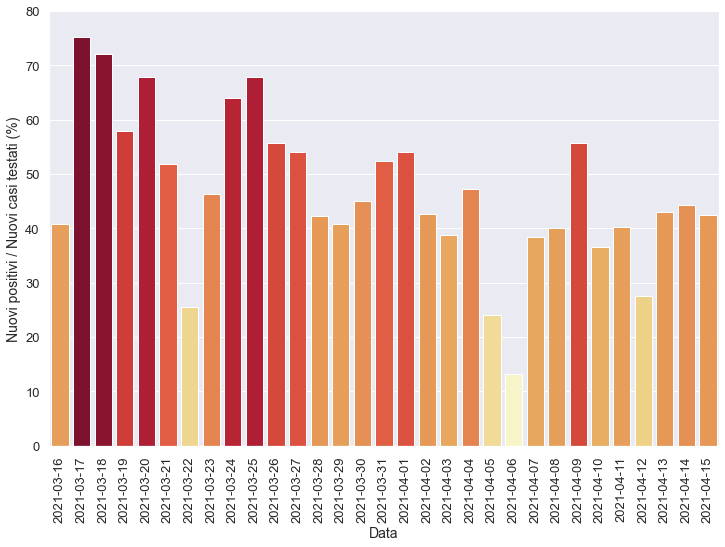

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

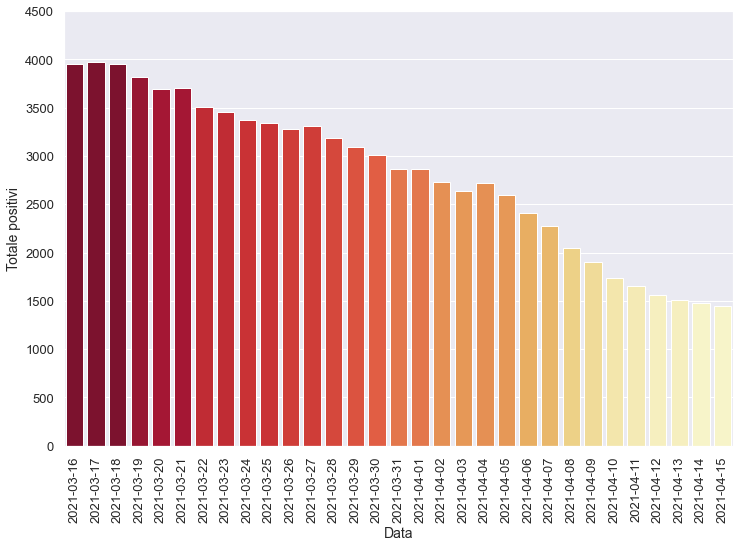

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

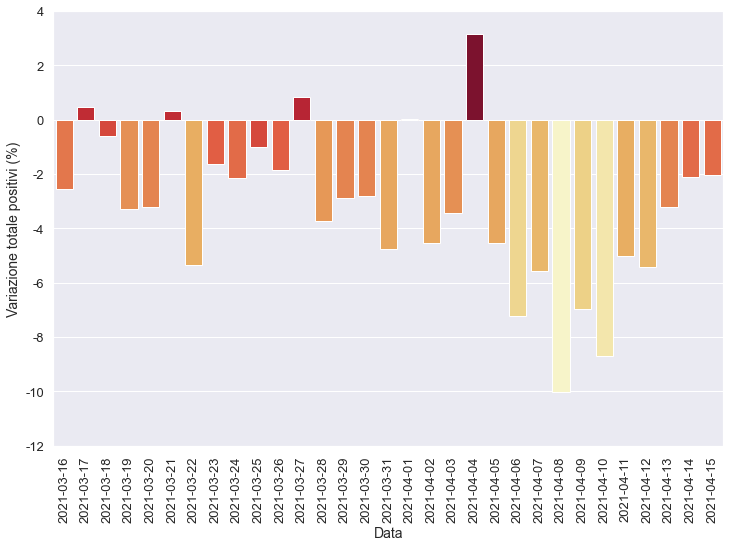

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

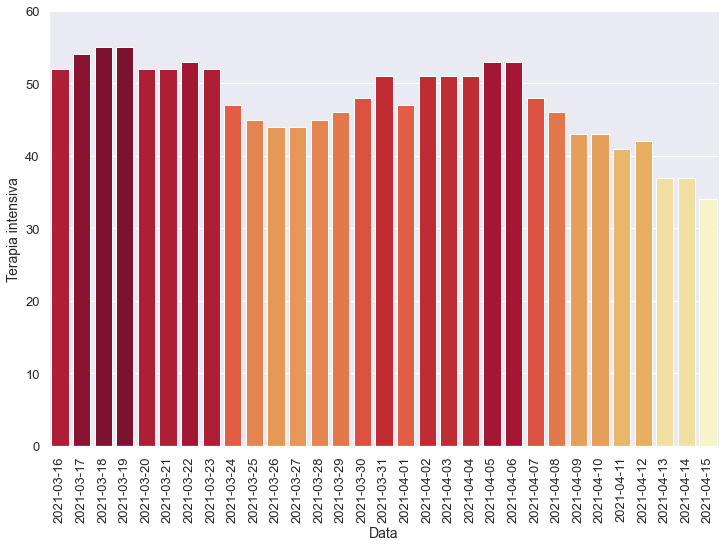

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

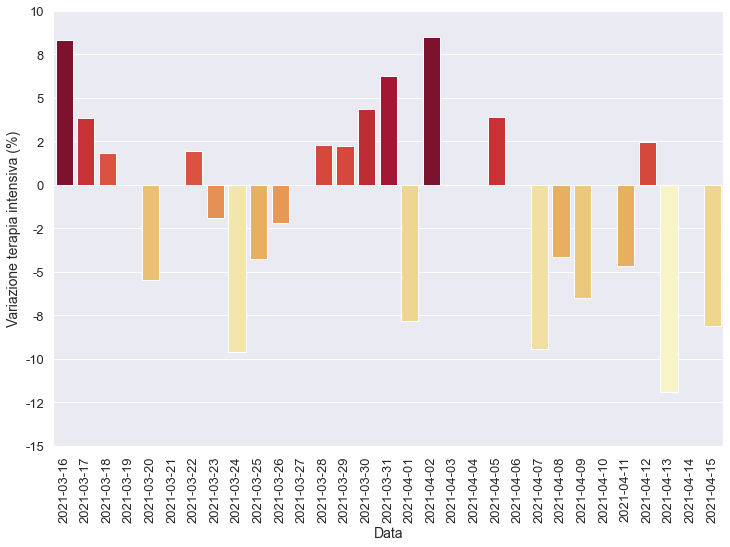

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

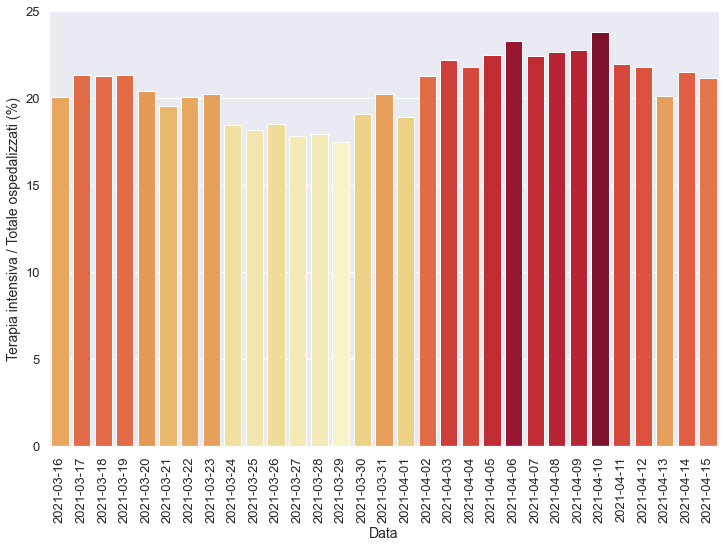

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

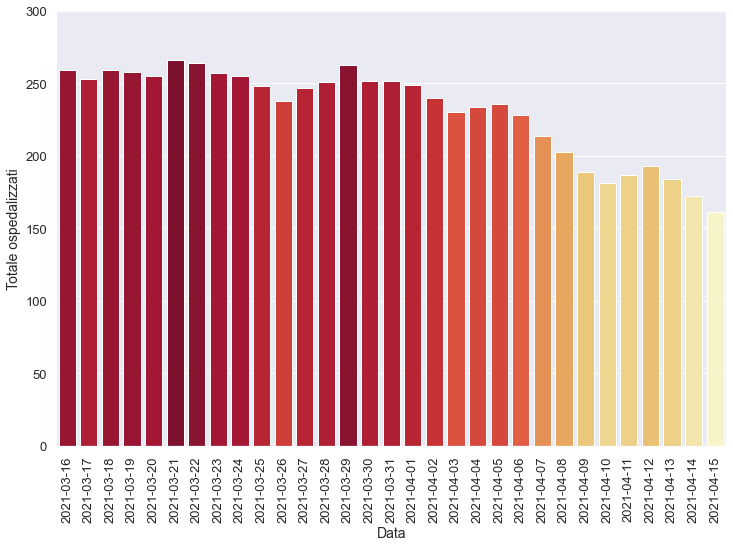

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

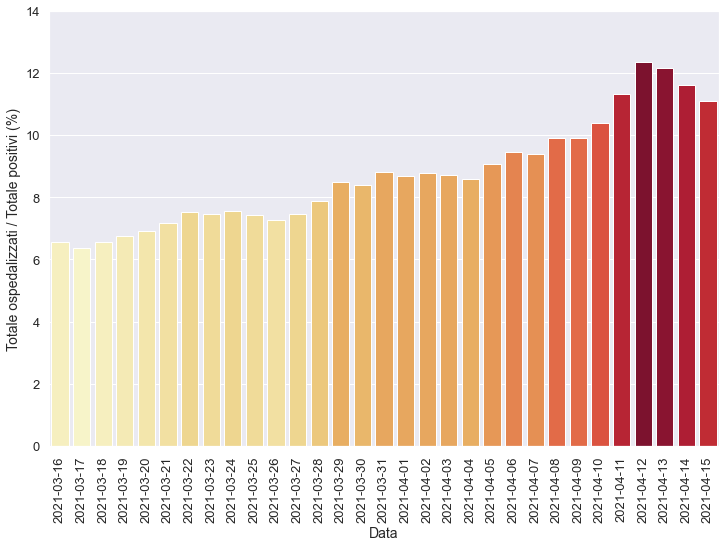

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

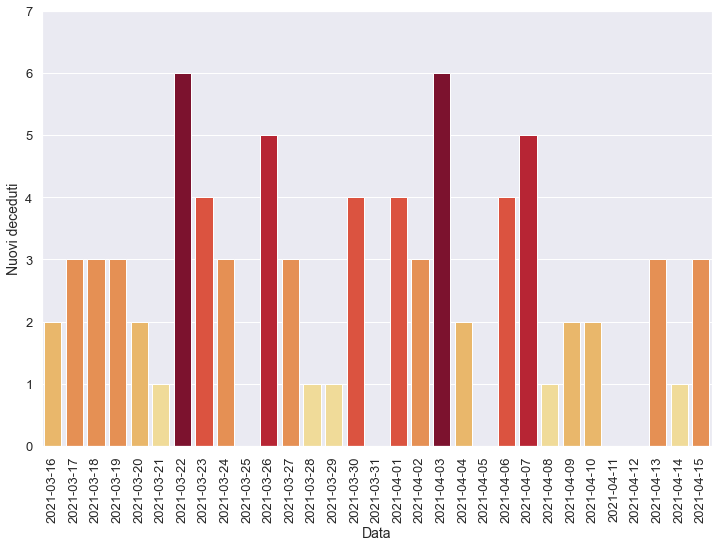

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

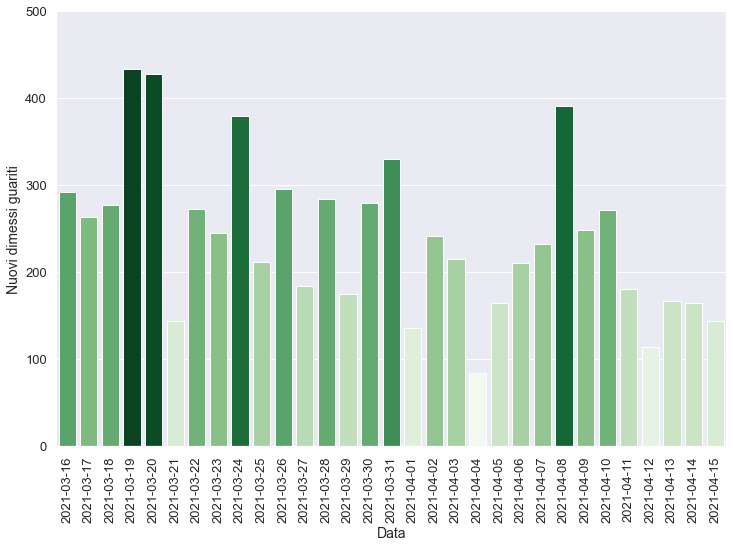

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-08T17:00:00,22,P.A. Trento,157,46,203,1846,2049,-228,164,...,1.0,3477.0,409.0,-217.0,22.66,9.91,4.72,40.10,-4.17,-10.01
1,2021-04-09T17:00:00,22,P.A. Trento,146,43,189,1717,1906,-143,107,...,2.0,2484.0,192.0,-129.0,22.75,9.92,4.31,55.73,-6.52,-6.98
2,2021-04-10T17:00:00,22,P.A. Trento,138,43,181,1559,1740,-166,107,...,2.0,2928.0,292.0,-158.0,23.76,10.40,3.65,36.64,0.00,-8.71
3,2021-04-11T17:00:00,22,P.A. Trento,146,41,187,1466,1653,-87,93,...,0.0,2207.0,231.0,-93.0,21.93,11.31,4.21,40.26,-4.65,-5.00
4,2021-04-12T17:00:00,22,P.A. Trento,151,42,193,1370,1563,-90,24,...,0.0,534.0,87.0,-96.0,21.76,12.35,4.49,27.59,2.44,-5.44
5,2021-04-13T17:00:00,22,P.A. Trento,147,37,184,1329,1513,-50,119,...,3.0,2248.0,277.0,-41.0,20.11,12.16,5.29,42.96,-11.90,-3.20
6,2021-04-14T17:00:00,22,P.A. Trento,135,37,172,1309,1481,-32,133,...,1.0,2450.0,300.0,-20.0,21.51,11.61,5.43,44.33,0.00,-2.12
7,2021-04-15T17:00:00,22,P.A. Trento,127,34,161,1290,1451,-30,117,...,3.0,2439.0,276.0,-19.0,21.12,11.10,4.80,42.39,-8.11,-2.03


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

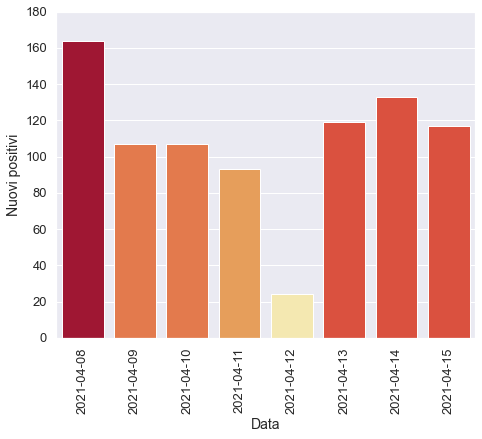

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

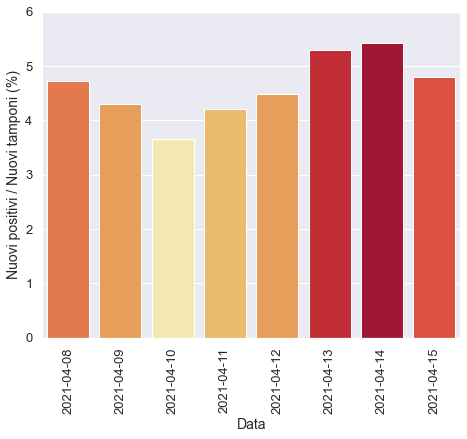

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

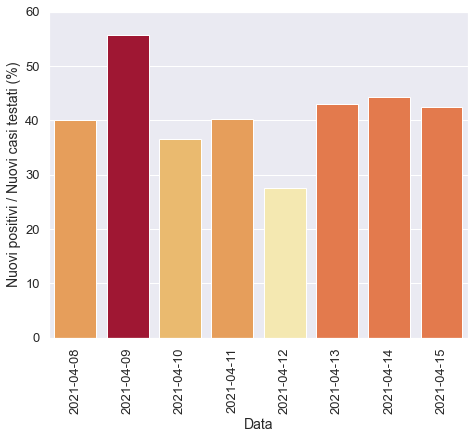

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

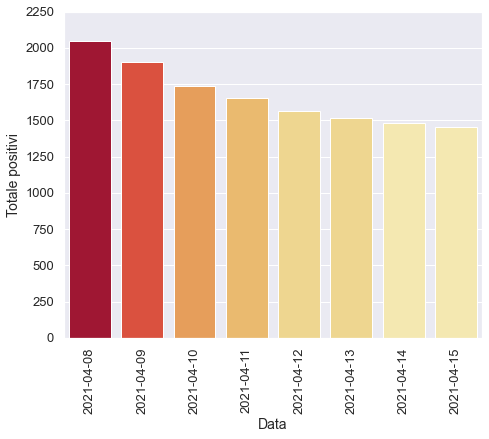

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

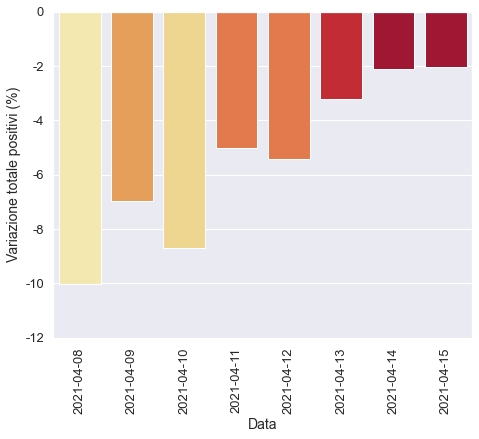

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

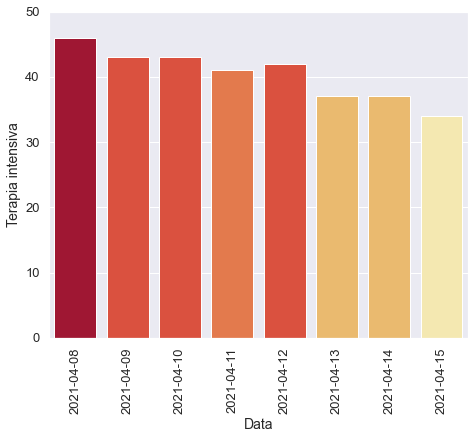

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

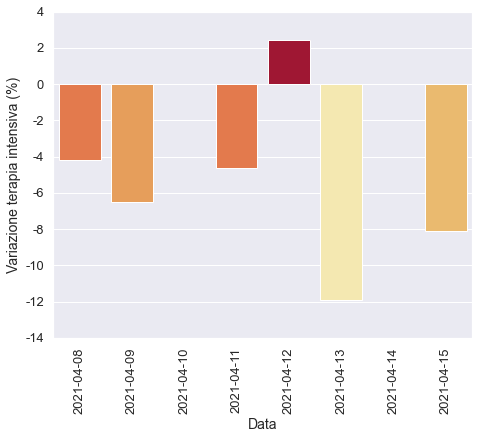

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

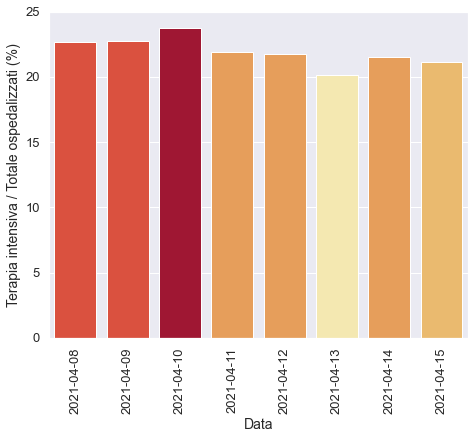

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

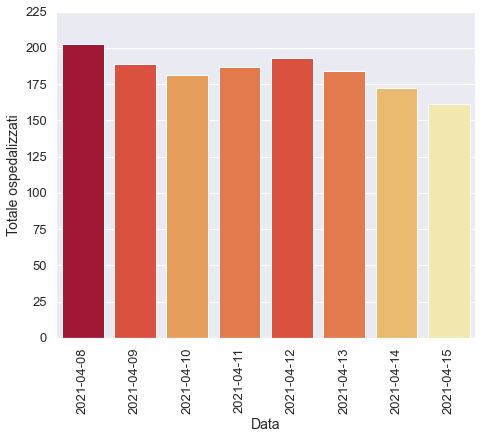

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

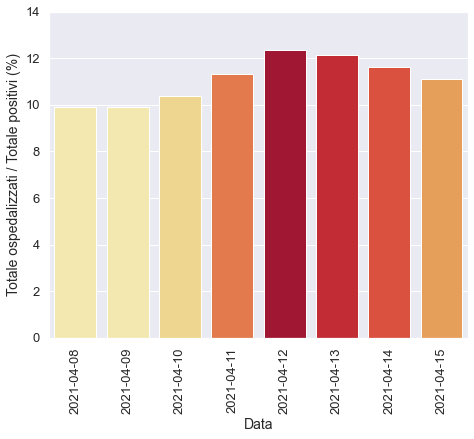

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

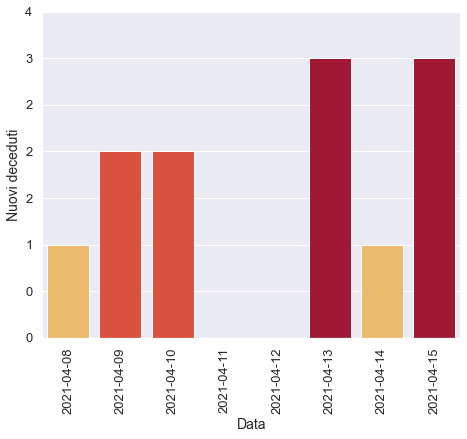

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

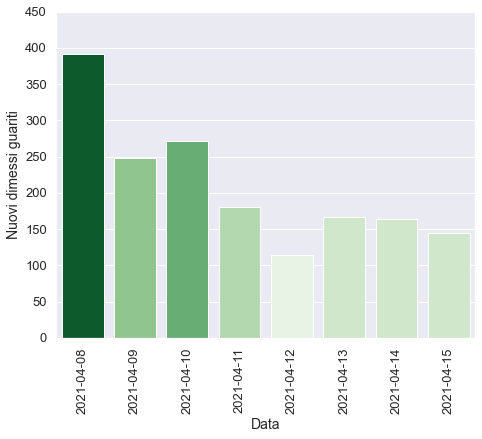

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)